In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from math import log10
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from math import log


In [336]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test_x.csv')
df.head(20)

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,...,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type
0,Ставрополь,NaN,COL_65683,45.011356,41.919273,7,71,144,225,0,...,969.0,8.439655,9.250000,1990.232759,1993.500000,Ставропольский край,31.0,S1842,2020-02-23,10
1,Омск,NaN,COL_159011,54.984833,73.387344,4,40,109,206,0,...,305.0,4.756410,4.333333,1960.346154,1956.291667,Омская область,150.0,S14290,2020-05-24,10
2,Белгород,NaN,COL_205850,50.576805,36.563267,0,9,22,44,0,...,533.0,6.435897,6.400000,1980.452991,1989.633333,Белгородская область,73.0,S25733,2020-06-28,10
3,Большой Исток,NaN,COL_229491,56.714413,60.792454,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,Свердловская область,438.0,S6985,2020-07-19,110
4,Новосибирск,1.0,COL_77283,55.055200,82.895810,0,25,50,101,0,...,1188.0,6.830065,6.672414,1974.045752,1974.637931,Новосибирская область,62.7,S4778,2020-03-01,10
5,Красноярск,1.0,COL_237766,56.054585,92.923680,3,15,39,66,0,...,488.0,11.113924,11.000000,2004.949367,2010.062500,Красноярский край,84.0,S2682,2020-07-26,100
6,Москва,2.0,COL_188715,55.861176,37.549427,1,39,96,133,0,...,16.0,14.909091,16.000000,1994.272727,1969.000000,Москва,623.0,S7194,2020-06-14,110
7,Волгоград,NaN,COL_77130,48.676510,44.472553,16,84,90,97,0,...,1063.0,8.827586,9.148936,1983.086207,1981.659574,Волгоградская область,70.0,S26181,2020-03-01,10
8,Белгород,1.0,COL_216454,50.557530,36.565690,1,27,65,85,0,...,1750.0,9.971429,10.660000,1999.809524,1999.360000,Белгородская область,68.0,S4639,2020-07-05,110
9,Иркутск,NaN,COL_262955,52.270250,104.310104,0,26,66,97,0,...,1073.0,6.338843,6.073529,1971.798354,1977.470588,Иркутская область,608.0,S19079,2020-08-16,10


In [337]:
#plt.subplots(figsize=(70, 70))
#sns.heatmap(df.corr()['per_square_meter_price'])
df.corr()['per_square_meter_price'].to_csv('corr.csv')

/var/folders/5p/9lyjttd939bd1j1pzshxy5kc0000gn/T/ipykernel_30367/2477904023.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['per_square_meter_price'].to_csv('corr.csv')


<AxesSubplot: >

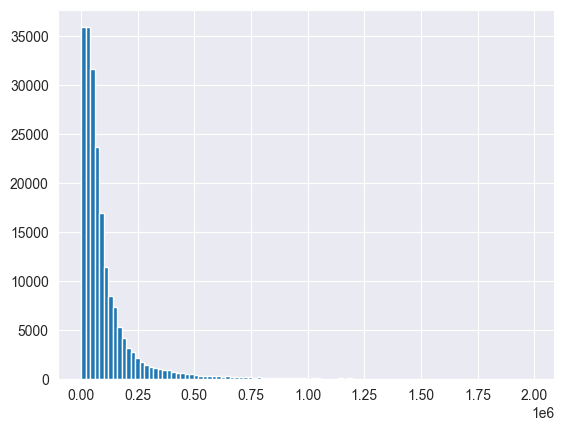

In [338]:
df.per_square_meter_price.hist(bins= 100)

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206474 entries, 0 to 206473
Data columns (total 76 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   city                                 206474 non-null  object 
 1   floor                                76209 non-null   float64
 2   id                                   206474 non-null  object 
 3   lat                                  206474 non-null  float64
 4   lng                                  206474 non-null  float64
 5   osm_amenity_points_in_0.001          206474 non-null  int64  
 6   osm_amenity_points_in_0.005          206474 non-null  int64  
 7   osm_amenity_points_in_0.0075         206474 non-null  int64  
 8   osm_amenity_points_in_0.01           206474 non-null  int64  
 9   osm_building_points_in_0.001         206474 non-null  int64  
 10  osm_building_points_in_0.005         206474 non-null  int64  
 11  osm_building_

In [340]:
print(df.columns.tolist())

['city', 'floor', 'id', 'lat', 'lng', 'osm_amenity_points_in_0.001', 'osm_amenity_points_in_0.005', 'osm_amenity_points_in_0.0075', 'osm_amenity_points_in_0.01', 'osm_building_points_in_0.001', 'osm_building_points_in_0.005', 'osm_building_points_in_0.0075', 'osm_building_points_in_0.01', 'osm_catering_points_in_0.001', 'osm_catering_points_in_0.005', 'osm_catering_points_in_0.0075', 'osm_catering_points_in_0.01', 'osm_city_closest_dist', 'osm_city_nearest_name', 'osm_city_nearest_population', 'osm_crossing_closest_dist', 'osm_crossing_points_in_0.001', 'osm_crossing_points_in_0.005', 'osm_crossing_points_in_0.0075', 'osm_crossing_points_in_0.01', 'osm_culture_points_in_0.001', 'osm_culture_points_in_0.005', 'osm_culture_points_in_0.0075', 'osm_culture_points_in_0.01', 'osm_finance_points_in_0.001', 'osm_finance_points_in_0.005', 'osm_finance_points_in_0.0075', 'osm_finance_points_in_0.01', 'osm_healthcare_points_in_0.005', 'osm_healthcare_points_in_0.0075', 'osm_healthcare_points_in_0

In [341]:
df.nunique()

city              4431
floor               92
id              206474
lat             103375
lng             106246
                 ...  
region              49
total_square     14669
street           24559
date                34
realty_type          3
Length: 76, dtype: int64

In [342]:
#plt.barh(df.floor, df.per_square_meter_price)
df.head(1000)

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,...,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type
0,Ставрополь,NaN,COL_65683,45.011356,41.919273,7,71,144,225,0,...,969.0,8.439655,9.250000,1990.232759,1993.500000,Ставропольский край,31.0,S1842,2020-02-23,10
1,Омск,NaN,COL_159011,54.984833,73.387344,4,40,109,206,0,...,305.0,4.756410,4.333333,1960.346154,1956.291667,Омская область,150.0,S14290,2020-05-24,10
2,Белгород,NaN,COL_205850,50.576805,36.563267,0,9,22,44,0,...,533.0,6.435897,6.400000,1980.452991,1989.633333,Белгородская область,73.0,S25733,2020-06-28,10
3,Большой Исток,NaN,COL_229491,56.714413,60.792454,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,Свердловская область,438.0,S6985,2020-07-19,110
4,Новосибирск,1.0,COL_77283,55.055200,82.895810,0,25,50,101,0,...,1188.0,6.830065,6.672414,1974.045752,1974.637931,Новосибирская область,62.7,S4778,2020-03-01,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Советский,NaN,COL_237587,61.359245,63.574680,3,22,44,79,0,...,140.0,2.603960,2.194444,1976.519608,1970.444444,Ханты-Мансийский АО,334.0,S7609,2020-07-19,110
996,Коммунарка,NaN,COL_170958,55.564940,37.498528,1,11,14,26,0,...,0.0,14.857143,NaN,2014.571429,NaN,Московская область,47.1,S24016,2020-05-31,10
997,Великий Устюг,NaN,COL_98306,60.763930,46.310802,0,1,22,45,0,...,132.0,2.586957,2.166667,1959.617021,1957.444444,Вологодская область,1665.9,S13735,2020-03-22,110
998,Казань,-1.0,COL_40801,55.789654,49.156110,5,59,101,175,0,...,879.0,6.972477,7.540541,1945.427273,1932.567568,Татарстан,90.0,S8099,2020-02-02,10


In [343]:
def create_street_top(df_streets, streets, mod):
    res = np.zeros(df_streets.shape[0])

def predProcess(df1):
    cities = pd.DataFrame({'city' : df1.city.unique()})
    cities['mean_price'] = np.zeros(cities.shape[0])
    for i, city in cities.iterrows():
        cities['mean_price'][i] = df1[df1.city == city['city']].per_square_meter_price.mean()
    cities = cities.sort_values(by='mean_price', ascending=False)
    size = cities.shape[0]
    df1['city_top_25%'] = np.zeros(df1.shape[0])
    df1['city_top_50%'] = np.zeros(df1.shape[0])
    df1['city_top_75%'] = np.zeros(df1.shape[0])
    df1['city_top_100%'] = np.zeros(df1.shape[0])
    ind = 0
    for i, city in cities.iterrows():
        ind += 1
        if size / 4 >= ind:
            df1.loc[df1.city == city['city'],'city_top_50%'] = 1
            continue
        if size / 2 >= ind:
            df1.loc[df1.city == city['city'],'city_top_75%'] = 1
            continue
        if 3 * size / 4 >= ind:
            df1.loc[df1.city == city['city'], 'city_top_100%'] = 1
            continue
        df1.loc[df1.city == city['city'], 'city_top_25%'] = 1

    df1['street'] = df1['street'].fillna('None')

    streets = pd.DataFrame({'street' : df1.street.unique()})
    streets = streets.set_index('street')
    streets['count'] = np.zeros(streets.shape[0])
    streets['sum'] = np.zeros(streets.shape[0])
    for i, next in df1.iterrows():
        streets['count'][next['street']] += 1
        streets['sum'][next['street']] += next['per_square_meter_price']
    streets = streets.assign(mean_price = streets['sum'] / streets['count'])
    streets = streets.sort_values(by='mean_price', ascending=False)
    size = cities.shape[0]
    df1['street_top_25%'] = np.zeros(df1.shape[0])
    df1['street_top_50%'] = np.zeros(df1.shape[0])
    df1['street_top_75%'] = np.zeros(df1.shape[0])
    df1['street_top_100%'] = np.zeros(df1.shape[0])
    df1['street_no_top'] = np.zeros(df1.shape[0])
    ind = 0
    for i, street in streets.iterrows():
        ind += 1
        if size / 4 >= ind:
            df1.loc[df1.street == i,'street_top_50%'] = 1
            continue
        if size / 2 >= ind:
            df1.loc[df1.street == i,'street_top_75%'] = 1
            continue
        if 3 * size / 4 >= ind:
            df1.loc[df1.street == i, 'street_top_100%'] = 1
            continue
        df1.loc[df1.street == i, 'street_top_25%'] = 1

    df1['floor'] = df1['floor'].fillna(-1)
    df1 = df1.assign(square = df1.lat * df1.lng,
                   floor_undefined = (df1.floor == -1).astype(int),
                   floor_0_3 = ((df1.floor >= 0) & (df1.floor < 3)).astype(int),
                   floor_3_6 = ((df1.floor >= 3) & (df1.floor < 6)).astype(int),
                   floor_6_9 = ((df1.floor >= 6) & (df1.floor < 9)).astype(int),
                   floor_9_ = (df1.floor > 9).astype(int),
                   )


    df1 = pd.get_dummies(df1, columns=['realty_type'])
    return df1

train_y = np.log2(df['per_square_meter_price'])
train_x = predProcess(df)
test['per_square_meter_price'] = np.zeros(test.shape[0])
test_x = predProcess(test)

/var/folders/5p/9lyjttd939bd1j1pzshxy5kc0000gn/T/ipykernel_30367/1637421743.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities['mean_price'][i] = df1[df1.city == city['city']].per_square_meter_price.mean()
/var/folders/5p/9lyjttd939bd1j1pzshxy5kc0000gn/T/ipykernel_30367/1637421743.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities['mean_price'][i] = df1[df1.city == city['city']].per_square_meter_price.mean()


In [344]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206474 entries, 0 to 206473
Data columns (total 93 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   city                                 206474 non-null  object 
 1   floor                                206474 non-null  float64
 2   id                                   206474 non-null  object 
 3   lat                                  206474 non-null  float64
 4   lng                                  206474 non-null  float64
 5   osm_amenity_points_in_0.001          206474 non-null  int64  
 6   osm_amenity_points_in_0.005          206474 non-null  int64  
 7   osm_amenity_points_in_0.0075         206474 non-null  int64  
 8   osm_amenity_points_in_0.01           206474 non-null  int64  
 9   osm_building_points_in_0.001         206474 non-null  int64  
 10  osm_building_points_in_0.005         206474 non-null  int64  
 11  osm_building_

In [353]:
train_x.head()

,city,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_transport_stop_closest_dist,per_square_meter_price,total_square,...,osm_hotels_points,osm_leisure_points,osm_offices_points,osm_shops_points,osm_transport_stop_points,osm_train_stop_points,reform_count_of_houses,reform_house_population,reform_mean_floor_count,reform_mean_year_building
0,Ставрополь,5.289954,Ставрополь,425853.0,0.152728,129.805013,7.087806,0.348982,17645.161290,31.0,...,15,20,13,577,104,0,180,5028.000000,26.939655,5977.232759
1,Омск,1.244242,Омск,1164815.0,0.056163,1.471690,5.031402,0.335314,33166.666667,150.0,...,1,22,65,314,65,0,126,1859.000000,13.423077,5872.929487
2,Белгород,2.691052,Белгород,384425.0,0.302913,555.502167,3.509734,0.347353,22493.150685,73.0,...,15,0,12,56,47,0,182,3100.000000,19.235897,5959.719658
3,Большой Исток,17.843233,Екатеринбург,1468833.0,2.175171,9.332574,4.271572,0.066303,79509.132420,438.0,...,0,0,0,0,26,0,1,1283.872419,21.838356,5903.622359
4,Новосибирск,3.480106,Новосибирск,1625600.0,0.038814,1.164664,2.078056,0.228898,126937.799043,62.7,...,0,5,24,208,52,0,273,6153.000000,20.174893,5923.321614


In [352]:
def proc_points(df1, name):
    df1[name] = 8 * df1[name + '_in_0.001'] + 4 * df1[name + '_in_0.005'] + \
                  2 * df1[name + '_in_0.0075'] + df1[name + '_in_0.01']
    df1 = df1.drop([name + '_in_0.001', name + '_in_0.005', name + '_in_0.0075', name + '_in_0.01'], axis=1)
    return df1

def proc_points1(df1, name):
    df1[name] = 4 * df1[name + '_in_0.005'] + \
                  2 * df1[name + '_in_0.0075'] + df1[name + '_in_0.01']
    df1 = df1.drop([name + '_in_0.005', name + '_in_0.0075', name + '_in_0.01'], axis=1)
    return df1

train_x = proc_points(train_x, 'osm_amenity_points')
train_x = proc_points(train_x, 'osm_building_points')
train_x = proc_points(train_x, 'osm_catering_points')
train_x = proc_points(train_x, 'osm_crossing_points')
train_x = proc_points(train_x, 'osm_culture_points')
train_x = proc_points(train_x, 'osm_finance_points')
train_x = proc_points1(train_x, 'osm_healthcare_points')
train_x = proc_points1(train_x, 'osm_historic_points')
train_x = proc_points1(train_x, 'osm_hotels_points')
train_x = proc_points1(train_x, 'osm_leisure_points')
train_x = proc_points(train_x, 'osm_offices_points')
train_x = proc_points(train_x, 'osm_shops_points')
train_x = proc_points1(train_x, 'osm_transport_stop_points')
train_x = proc_points1(train_x, 'osm_train_stop_points')

test_x = proc_points(test_x, 'osm_amenity_points')
test_x = proc_points(test_x, 'osm_building_points')
test_x = proc_points(test_x, 'osm_catering_points')
test_x = proc_points(test_x, 'osm_crossing_points')
test_x = proc_points(test_x, 'osm_culture_points')
test_x = proc_points(test_x, 'osm_finance_points')
test_x = proc_points1(test_x, 'osm_healthcare_points')
test_x = proc_points1(test_x, 'osm_historic_points')
test_x = proc_points1(test_x, 'osm_hotels_points')
test_x = proc_points1(test_x, 'osm_leisure_points')
test_x = proc_points(test_x, 'osm_offices_points')
test_x = proc_points(test_x, 'osm_shops_points')
test_x = proc_points1(test_x, 'osm_transport_stop_points')
test_x = proc_points1(test_x, 'osm_train_stop_points')

KeyError: 'osm_amenity_points_in_0.001'

In [355]:
train_x

,city,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_transport_stop_closest_dist,per_square_meter_price,total_square,...,osm_hotels_points,osm_leisure_points,osm_offices_points,osm_shops_points,osm_transport_stop_points,osm_train_stop_points,reform_count_of_houses,reform_house_population,reform_mean_floor_count,reform_mean_year_building
0,Ставрополь,5.289954,Ставрополь,425853.0,0.152728,129.805013,7.087806,0.348982,17645.161290,31.00,...,15,20,13,577,104,0,180,5028.000000,26.939655,5977.232759
1,Омск,1.244242,Омск,1164815.0,0.056163,1.471690,5.031402,0.335314,33166.666667,150.00,...,1,22,65,314,65,0,126,1859.000000,13.423077,5872.929487
2,Белгород,2.691052,Белгород,384425.0,0.302913,555.502167,3.509734,0.347353,22493.150685,73.00,...,15,0,12,56,47,0,182,3100.000000,19.235897,5959.719658
3,Большой Исток,17.843233,Екатеринбург,1468833.0,2.175171,9.332574,4.271572,0.066303,79509.132420,438.00,...,0,0,0,0,26,0,1,1283.872419,21.838356,5903.622359
4,Новосибирск,3.480106,Новосибирск,1625600.0,0.038814,1.164664,2.078056,0.228898,126937.799043,62.70,...,0,5,24,208,52,0,273,6153.000000,20.174893,5923.321614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206469,Нижний Тагил,0.951108,Нижний Тагил,353950.0,0.066669,119.501190,1.894064,0.090132,60682.926829,41.00,...,1,0,20,211,31,0,245,4433.000000,16.586667,5901.283016
206470,Новосибирск,4.959517,Новосибирск,1625600.0,0.182604,2.713640,0.904833,0.228005,74801.627670,98.30,...,0,3,0,69,16,0,187,4528.000000,18.278265,5894.730416
206471,Ставрополь,6.253358,Ставрополь,425853.0,0.081509,128.616587,8.245808,0.083060,17085.187195,921.50,...,2,34,23,769,108,0,136,3583.000000,27.323308,5989.672932
206472,Санкт-Петербург,9.278978,Санкт-Петербург,5381736.0,0.091900,0.455776,1.750400,0.102568,138665.333667,40.01,...,11,57,83,785,258,0,164,6254.000000,22.497904,5886.147799


In [348]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206474 entries, 0 to 206473
Data columns (total 57 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   city                             206474 non-null  object 
 1   floor                            206474 non-null  float64
 2   id                               206474 non-null  object 
 3   lat                              206474 non-null  float64
 4   lng                              206474 non-null  float64
 5   osm_city_closest_dist            206474 non-null  float64
 6   osm_city_nearest_name            206474 non-null  object 
 7   osm_city_nearest_population      206439 non-null  float64
 8   osm_crossing_closest_dist        206474 non-null  float64
 9   osm_subway_closest_dist          206474 non-null  float64
 10  osm_train_stop_closest_dist      206474 non-null  float64
 11  osm_transport_stop_closest_dist  206474 non-null  float64
 12  pe

In [354]:
def proc_reform(df1, name):
    df1[name + '_500'] = df1[name + '_500'].fillna(df1[name + '_500'].mean())
    df1[name + '_1000'] = df1[name + '_1000'].fillna(df1[name + '_1000'].mean())

    df1[name] = 2 * df1[name + '_500'] + df1[name + '_1000']
    df1 = df1.drop([name + '_500', name + '_1000'], axis=1)
    return df1

train_x = proc_reform(train_x, 'reform_count_of_houses')
train_x = proc_reform(train_x, 'reform_house_population')
train_x = proc_reform(train_x, 'reform_mean_floor_count')
train_x = proc_reform(train_x, 'reform_mean_year_building')

test_x = proc_reform(test_x, 'reform_count_of_houses')
test_x = proc_reform(test_x, 'reform_house_population')
test_x = proc_reform(test_x, 'reform_mean_floor_count')
test_x = proc_reform(test_x, 'reform_mean_year_building')

KeyError: 'reform_count_of_houses_500'

In [350]:
train_x.head()

,city,floor,id,lat,lng,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_subway_closest_dist,...,osm_hotels_points,osm_leisure_points,osm_offices_points,osm_shops_points,osm_transport_stop_points,osm_train_stop_points,reform_count_of_houses,reform_house_population,reform_mean_floor_count,reform_mean_year_building
0,Ставрополь,-1.0,COL_65683,45.011356,41.919273,5.289954,Ставрополь,425853.0,0.152728,129.805013,...,15,20,13,577,104,0,180,5028.000000,26.939655,5977.232759
1,Омск,-1.0,COL_159011,54.984833,73.387344,1.244242,Омск,1164815.0,0.056163,1.471690,...,1,22,65,314,65,0,126,1859.000000,13.423077,5872.929487
2,Белгород,-1.0,COL_205850,50.576805,36.563267,2.691052,Белгород,384425.0,0.302913,555.502167,...,15,0,12,56,47,0,182,3100.000000,19.235897,5959.719658
3,Большой Исток,-1.0,COL_229491,56.714413,60.792454,17.843233,Екатеринбург,1468833.0,2.175171,9.332574,...,0,0,0,0,26,0,1,1283.872419,21.838356,5903.622359
4,Новосибирск,1.0,COL_77283,55.055200,82.895810,3.480106,Новосибирск,1625600.0,0.038814,1.164664,...,0,5,24,208,52,0,273,6153.000000,20.174893,5923.321614


In [357]:
drop = ['osm_amenity_points_in_0.001', 'osm_amenity_points_in_0.005', 'osm_amenity_points_in_0.0075', 'osm_amenity_points_in_0.01', 'osm_building_points_in_0.001', 'osm_building_points_in_0.005', 'osm_building_points_in_0.0075', 'osm_building_points_in_0.01', 'osm_catering_points_in_0.001', 'osm_catering_points_in_0.005', 'osm_catering_points_in_0.0075', 'osm_catering_points_in_0.01', 'osm_city_closest_dist', 'osm_city_nearest_name', 'osm_city_nearest_population', 'osm_crossing_closest_dist', 'osm_crossing_points_in_0.001', 'osm_crossing_points_in_0.005', 'osm_crossing_points_in_0.0075', 'osm_crossing_points_in_0.01', 'osm_culture_points_in_0.001', 'osm_culture_points_in_0.005', 'osm_culture_points_in_0.0075', 'osm_culture_points_in_0.01', 'osm_finance_points_in_0.001', 'osm_finance_points_in_0.005', 'osm_finance_points_in_0.0075', 'osm_finance_points_in_0.01', 'osm_healthcare_points_in_0.005', 'osm_healthcare_points_in_0.0075', 'osm_healthcare_points_in_0.01', 'osm_historic_points_in_0.005', 'osm_historic_points_in_0.0075', 'osm_historic_points_in_0.01', 'osm_hotels_points_in_0.005', 'osm_hotels_points_in_0.0075', 'osm_hotels_points_in_0.01', 'osm_leisure_points_in_0.005', 'osm_leisure_points_in_0.0075', 'osm_leisure_points_in_0.01', 'osm_offices_points_in_0.001', 'osm_offices_points_in_0.005', 'osm_offices_points_in_0.0075', 'osm_offices_points_in_0.01', 'osm_shops_points_in_0.001', 'osm_shops_points_in_0.005', 'osm_shops_points_in_0.0075', 'osm_shops_points_in_0.01', 'osm_subway_closest_dist', 'osm_train_stop_closest_dist', 'osm_train_stop_points_in_0.005', 'osm_train_stop_points_in_0.0075', 'osm_train_stop_points_in_0.01', 'osm_transport_stop_closest_dist', 'osm_transport_stop_points_in_0.005', 'osm_transport_stop_points_in_0.0075', 'osm_transport_stop_points_in_0.01', 'reform_count_of_houses_1000', 'reform_count_of_houses_500', 'reform_house_population_1000', 'reform_house_population_500', 'reform_mean_floor_count_1000', 'reform_mean_floor_count_500', 'reform_mean_year_building_1000', 'reform_mean_year_building_500', 'street', 'date']
train_x = train_x.drop(['lng', 'lat', 'floor', 'id', 'region'], axis=1)
#train_x = train_x.drop(drop, axis=1)

KeyError: "['lng', 'lat', 'floor', 'id', 'region'] not found in axis"

In [356]:
train_x.head()

,city,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_transport_stop_closest_dist,per_square_meter_price,total_square,...,osm_hotels_points,osm_leisure_points,osm_offices_points,osm_shops_points,osm_transport_stop_points,osm_train_stop_points,reform_count_of_houses,reform_house_population,reform_mean_floor_count,reform_mean_year_building
0,Ставрополь,5.289954,Ставрополь,425853.0,0.152728,129.805013,7.087806,0.348982,17645.161290,31.0,...,15,20,13,577,104,0,180,5028.000000,26.939655,5977.232759
1,Омск,1.244242,Омск,1164815.0,0.056163,1.471690,5.031402,0.335314,33166.666667,150.0,...,1,22,65,314,65,0,126,1859.000000,13.423077,5872.929487
2,Белгород,2.691052,Белгород,384425.0,0.302913,555.502167,3.509734,0.347353,22493.150685,73.0,...,15,0,12,56,47,0,182,3100.000000,19.235897,5959.719658
3,Большой Исток,17.843233,Екатеринбург,1468833.0,2.175171,9.332574,4.271572,0.066303,79509.132420,438.0,...,0,0,0,0,26,0,1,1283.872419,21.838356,5903.622359
4,Новосибирск,3.480106,Новосибирск,1625600.0,0.038814,1.164664,2.078056,0.228898,126937.799043,62.7,...,0,5,24,208,52,0,273,6153.000000,20.174893,5923.321614


In [358]:
train_x = train_x.drop(['city', 'osm_city_nearest_name', 'osm_city_nearest_population'], axis = 1)

In [359]:
test_x = test_x.drop(['lng', 'lat', 'floor', 'id', 'region', 'city', 'osm_city_nearest_name', 'osm_city_nearest_population'], axis=1)
#test_x = test_x.drop(drop, axis=1)
train_x = train_x.drop('per_square_meter_price', axis=1)
test_x = test_x.drop('per_square_meter_price', axis=1)

In [366]:
train_x = train_x.drop(['street', 'date'], axis=1)
test_x = test_x.drop(['street', 'date'], axis=1)

In [371]:
train_x = train_x.drop(['osm_crossing_points', 'osm_city_closest_dist', 'osm_subway_closest_dist', 'osm_train_stop_closest_dist', 'osm_crossing_closest_dist', 'osm_transport_stop_closest_dist'], axis=1)
test_x = test_x.drop(['osm_crossing_points', 'osm_city_closest_dist', 'osm_subway_closest_dist', 'osm_train_stop_closest_dist', 'osm_crossing_closest_dist', 'osm_transport_stop_closest_dist'], axis=1)

KeyError: "['osm_crossing_points', 'osm_city_closest_dist', 'osm_subway_closest_dist', 'osm_train_stop_closest_dist'] not found in axis"

In [373]:
train_x = train_x.drop(['osm_crossing_closest_dist', 'osm_transport_stop_closest_dist'], axis=1)
test_x = test_x.drop(['osm_crossing_closest_dist', 'osm_transport_stop_closest_dist'], axis=1)

In [ ]:
train_x.info()

In [374]:
train_x.head(100)

,total_square,city_top_25%,city_top_50%,city_top_75%,city_top_100%,street_top_25%,street_top_50%,street_top_75%,street_top_100%,street_no_top,...,osm_hotels_points,osm_leisure_points,osm_offices_points,osm_shops_points,osm_transport_stop_points,osm_train_stop_points,reform_count_of_houses,reform_house_population,reform_mean_floor_count,reform_mean_year_building
0,31.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,15,20,13,577,104,0,180,5028.000000,26.939655,5977.232759
1,150.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,22,65,314,65,0,126,1859.000000,13.423077,5872.929487
2,73.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,15,0,12,56,47,0,182,3100.000000,19.235897,5959.719658
3,438.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,26,0,1,1283.872419,21.838356,5903.622359
4,62.7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,5,24,208,52,0,273,6153.000000,20.174893,5923.321614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3852.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,13,16,615,159,0,274,5851.000000,19.394037,5908.350543
96,361.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,12,0,0,46,541.000000,9.333333,5948.242424
97,36.6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22,12,10,260,142,0,290,3307.000000,15.986842,5901.388158
98,68.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,7,14,0,194,29,0,227,2149.000000,8.679822,5942.184686


In [ ]:
test_x.head()

<AxesSubplot: >

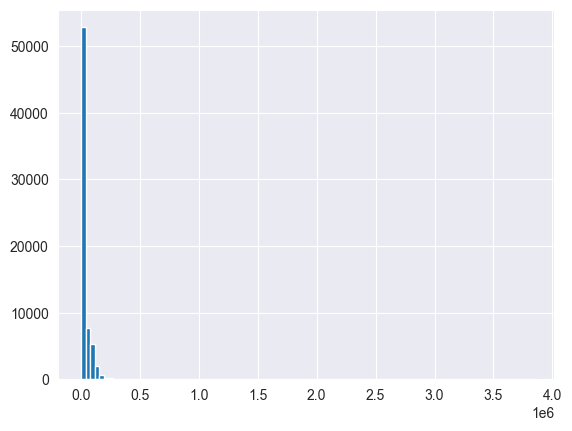

In [375]:
model = LinearRegression()
model.fit(train_x, train_y)
pred = model.predict(test_x)
#print(mean_absolute_percentage_error(2**test_y, 2**pred))
res = pd.DataFrame({'id' : np.arange(pred.shape[0]), 'per_square_meter_price' : 2**pred})
res = res.groupby(['id']).mean()
res.to_csv('out.csv')
res.per_square_meter_price.hist(bins= 100)

In [ ]:
train_x.sum()

In [ ]:
df.nunique()